In [1]:
import pandas as pd 
import yfinance as yf
import datetime as dt 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
assets = ['GE', 'RTX', 'LMT', 'BA', 'GD', 'NOC', 'HAL'] #stocks 
benchmarks = ['SPY', 'IWM', 'DIA'] #ETF
startdate = dt.datetime.today() - dt.timedelta(9125)  # Data for past ~25 years
tickers = assets + benchmarks


In [3]:
data = yf.download(tickers, start=startdate)['Adj Close']
data[benchmarks]

[*********************100%***********************]  10 of 10 completed


Ticker,SPY,IWM,DIA
Date,,,
1999-11-29 00:00:00+00:00,89.906563,NaN,63.599674
1999-11-30 00:00:00+00:00,88.849991,NaN,63.100712
1999-12-01 00:00:00+00:00,89.567665,NaN,63.917107
1999-12-02 00:00:00+00:00,90.105904,NaN,64.216476
1999-12-03 00:00:00+00:00,91.760452,NaN,65.577187
...,...,...,...
2024-11-13 00:00:00+00:00,597.190002,235.110001,439.542725
2024-11-14 00:00:00+00:00,593.349976,231.940002,437.434021
2024-11-15 00:00:00+00:00,585.750000,228.479996,434.510010


In [4]:
data[assets]
#asset_yr_change = data[assets].pct_change(252)


Ticker,GE,RTX,LMT,BA,GD,NOC,HAL
Date,,,,,,,
1999-11-29 00:00:00+00:00,115.586487,10.062631,10.910374,26.384041,15.238305,14.381711,13.154469
1999-11-30 00:00:00+00:00,112.981728,10.467915,10.642634,26.222683,15.368701,14.799492,13.175790
1999-12-01 00:00:00+00:00,116.780319,10.757396,10.809975,26.787476,15.126528,14.955630,14.028598
1999-12-02 00:00:00+00:00,116.943123,10.890567,10.743036,25.899940,15.336095,15.056905,13.506258
1999-12-03 00:00:00+00:00,118.299744,11.185850,10.709576,26.061302,15.517733,15.715228,13.111830
...,...,...,...,...,...,...,...
2024-11-13 00:00:00+00:00,183.559998,123.094414,557.729980,139.970001,314.029999,520.419983,30.190001
2024-11-14 00:00:00+00:00,178.399994,118.290001,538.989990,138.139999,292.420013,500.339996,30.110001
2024-11-15 00:00:00+00:00,176.929993,118.529999,534.830017,140.190002,287.989990,493.989990,29.690001


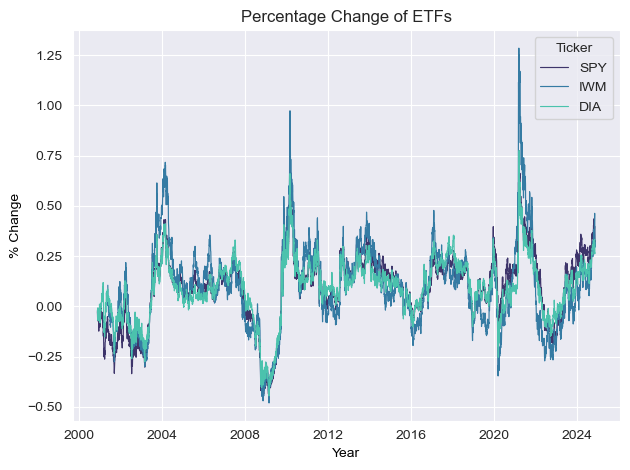

In [5]:
bench_yr_change = data[benchmarks].pct_change(252)

sns.set_style('darkgrid')
palette = sns.color_palette('mako', 3)
sns.lineplot(data=bench_yr_change, markers=False, dashes=False, errorbar='sd', palette=palette, linewidth=0.85)
plt.title('Percentage Change of ETFs')
plt.xlabel('Year', color='black')
plt.ylabel('% Change', color='black')
plt.tight_layout()


<Figure size 1500x1000 with 0 Axes>

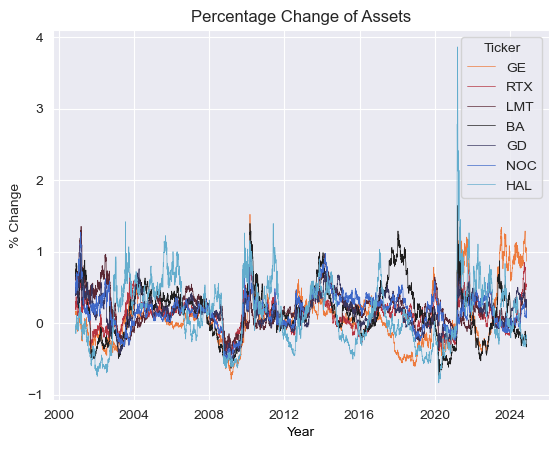

<Figure size 1500x1000 with 0 Axes>

In [6]:
asset_yr_change = data[assets].pct_change(252)
palette= sns.color_palette('icefire_r', 7)
sns.lineplot(data=asset_yr_change, dashes=False, markers=False, errorbar='sd', palette=palette, linewidth=0.5)
plt.title("Percentage Change of Assets")
plt.xlabel('Year', color = 'black')
plt.ylabel('% Change')
plt.figure(figsize= (15,10))


<Figure size 1000x800 with 0 Axes>

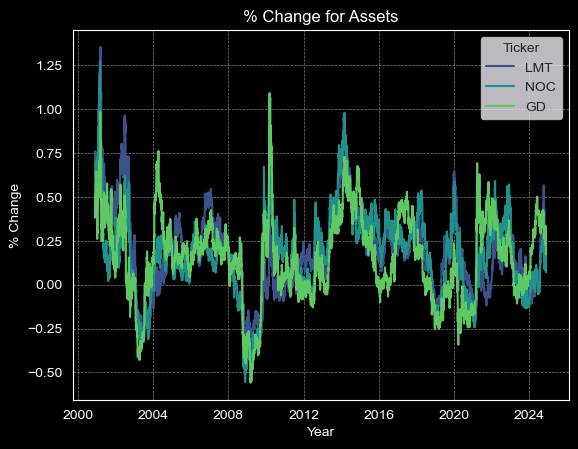

<Figure size 1000x800 with 0 Axes>

In [7]:
chart1 = data[['LMT', 'NOC', 'GD']].pct_change(252)
chart1
palette = sns.color_palette('viridis', 3)
sns.lineplot(data=chart1, linewidth=1.5, dashes=False, markers=False, palette=palette)

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gcf().patch.set_facecolor('black')  # Set figure background to black
ax = plt.gca()
ax.set_facecolor('black')  # Set axes background to black

# Customize the grid and tick colors to be visible on a black background
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)  # Grid lines in gray
ax.tick_params(axis='both', colors='white')  # White ticks on both axes
ax.spines['top'].set_color('white')  # Set border color to white
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
plt.title('% Change for Assets', color='white')
plt.xlabel('Year', color='white')
plt.ylabel('% Change', color='white')
plt.figure(figsize=(10,8))


<Figure size 1000x800 with 0 Axes>

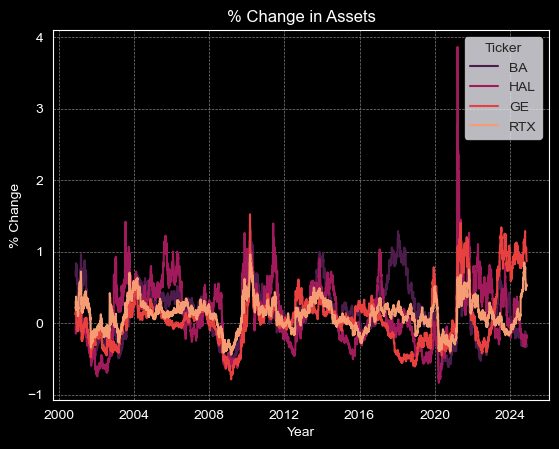

<Figure size 1000x800 with 0 Axes>

In [8]:
chart2 = data[['BA', 'HAL', 'GE', 'RTX']].pct_change(252)
palette = sns.color_palette('rocket', 4)
sns.lineplot(data=chart2, linewidth=1.5, dashes=False, markers=False, palette=palette)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gcf().patch.set_facecolor('black')  # Set figure background to black
ax = plt.gca()
ax.set_facecolor('black')  # Set axes background to black

# Customize the grid and tick colors to be visible on a black background
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)  # Grid lines in gray
ax.tick_params(axis='both', colors='white')  # White ticks on both axes
ax.spines['top'].set_color('white')  # Set border color to white
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
plt.title('% Change in Assets', color='white')
plt.xlabel('Year', color='white')
plt.ylabel('% Change', color='white')
plt.figure(figsize=(10,8))


<Axes: xlabel='Ticker', ylabel='Ticker'>

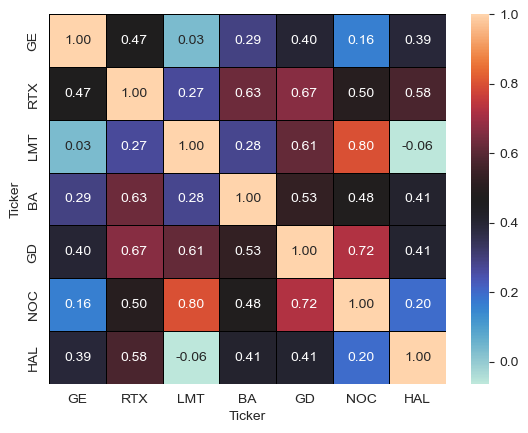

In [9]:
correlation_matrix = asset_yr_change.corr()
correlation_matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5, linecolor='black', cmap='icefire')

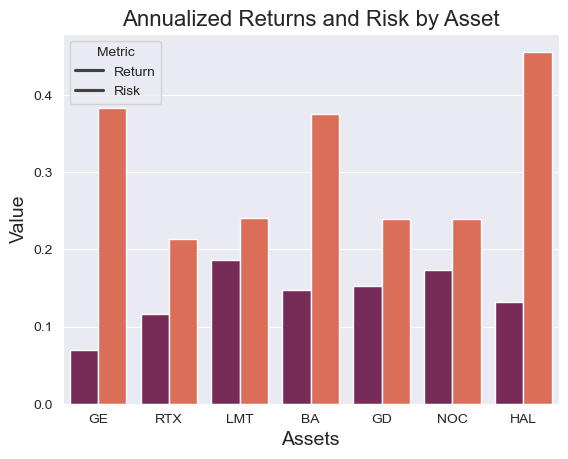

<Figure size 1000x600 with 0 Axes>

In [10]:
returns = data[assets].pct_change(252).mean()
risk = data[assets].pct_change(252).std()
df = pd.DataFrame(index=assets)

df['returns'] = returns
df['risk'] = risk

df


df_long = df.reset_index().melt(id_vars='index', value_vars=['returns', 'risk'], 
                                var_name='metric', value_name='value')

# Rename the columns for clarity
df_long.columns = ['asset', 'metric', 'value']

# Set the figure size


# Create the barplot using Seaborn
sns.barplot(x='asset', y='value', hue='metric', data=df_long, palette='rocket')

# Adding labels and title
plt.xlabel('Assets', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Annualized Returns and Risk by Asset', fontsize=16)

plt.legend(title='Metric', labels=['Return', 'Risk'])
plt.figure(figsize=(10, 6))

# Display the chart
plt.tight_layout()
plt.show()